<h1>Chapter 06. Decision Trees</h1>

Decision Trees: A predictive modeling technique that recursively partitions data into smaller subsets based on feature values, forming a tree-like structure to make decisions and predict outcomes for classification or regression tasks.

<h2>Training and Visualizing a Decision Tree</h2>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)  # limit the decision tree's maximum depth to 2
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Visualization of the teached Decision Tree

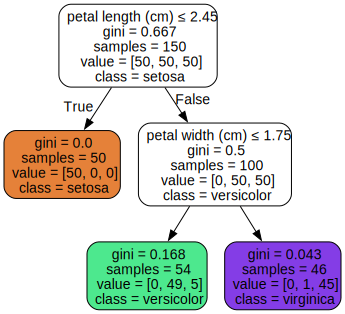

In [2]:
from sklearn.tree import export_graphviz
from IPython.display import display
from graphviz import Source


dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    special_characters=True
)

display(Source(dot_data))

<h2>Making Predictions</h2>

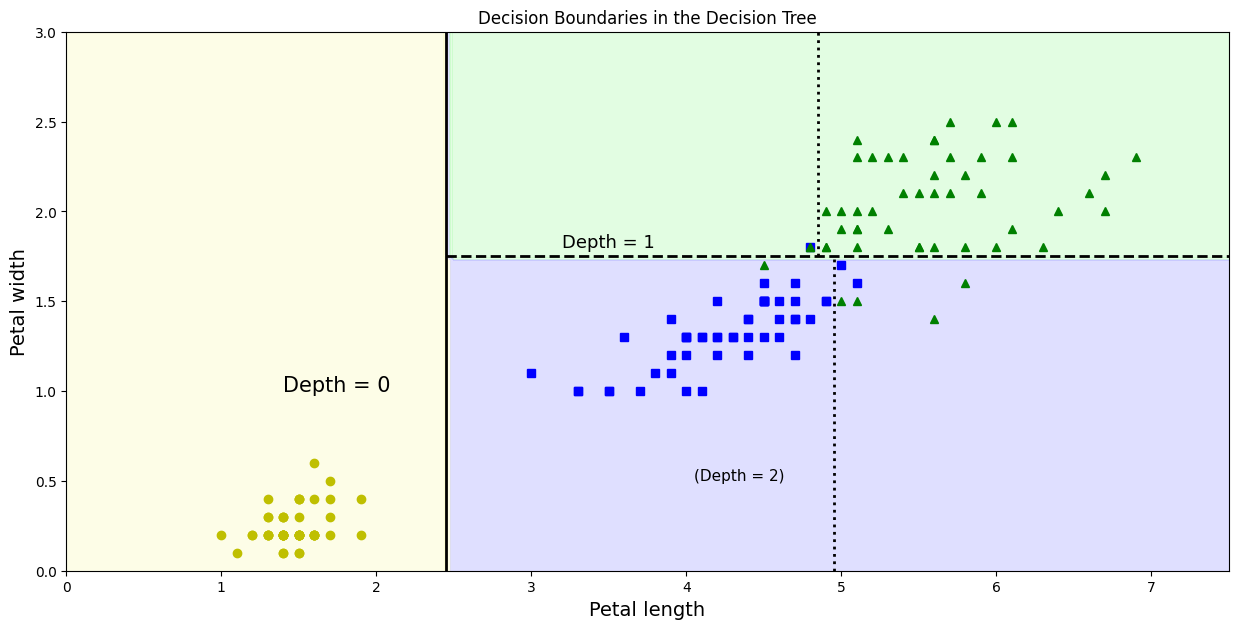

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    
    plt.contourf(
        x1,
        x2,
        y_pred,
        cmap=custom_cmap,
        alpha=0.3
    )
    if legend:
        plt.legend(loc='lower right', fontsize=14)

    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(
            x1,
            x2,
            y_pred,
            cmap=custom_cmap2,
            alpha=0.8
        )

    if plot_training:
        plt.plot(
            X[:, 0][y == 0],
            X[:, 1][y == 0],
            'yo',
            label='Iris-Setosa'
        )
        plt.plot(
            X[:, 0][y == 1],
            X[:, 1][y == 1],
            'bs',
            label='Iris-Versicolor'
        )
        plt.plot(
            X[:, 0][y == 2],
            X[:, 1][y == 2],
            'g^',
            label='Iris-Virginica'
        )
        plt.axis(axes)

    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)

    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)

plt.figure(figsize=(15, 7))
plot_decision_boundary(clf=tree_clf, X=X, y=y)
plt.plot(
    [2.45, 2.45],
    [0, 3],
    'k-',
    linewidth=2
)
plt.plot(
    [2.45, 7.5],
    [1.75, 1.75],
    'k--',
    linewidth=2
)
plt.plot(
    [4.95, 4.95],
    [0, 1.75],
    'k:',
    linewidth=2
)
plt.plot(
    [4.85, 4.85],
    [1.75, 3],
    'k:',
    linewidth=2
)
plt.text(
    1.40,
    1.0,
    'Depth = 0',
    fontsize=15
)
plt.text(
    3.2,
    1.8,
    'Depth = 1',
    fontsize=13
)
plt.text(
    4.05,
    0.5,
    '(Depth = 2)',
    fontsize=11
)
plt.title('Decision Boundaries in the Decision Tree')
plt.show()